In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
path = '/Users/jeremyvuong/Downloads/Churn_Modelling.csv'
data = pd.read_csv(path,header='infer')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
#drop uselesss features
data = data.drop(['RowNumber','CustomerId','Surname'],axis=1)

#encode labels
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Geography'] = le.fit_transform(data['Geography'])
data[500:1000]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
500,555,2,1,32,4,0.00,2,1,1,54405.79,0
501,692,0,1,54,5,0.00,2,1,1,88721.84,0
502,774,0,1,60,5,85891.55,1,1,0,74135.48,1
503,638,2,1,44,9,77637.35,2,1,1,111346.22,0
504,543,2,0,41,4,0.00,1,0,0,194902.16,0
...,...,...,...,...,...,...,...,...,...,...,...
995,610,2,1,29,9,0.00,3,0,1,83912.24,0
996,811,2,1,44,3,0.00,2,0,1,78439.73,0
997,587,2,1,62,7,121286.27,1,0,1,6776.92,0
998,811,1,0,28,4,167738.82,2,1,1,9903.42,0


In [4]:
Y = data['Exited']
X = data.drop(['Exited'],axis=1)

# Train/Test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("\nX_train:\n")
print(X_train.head())
print(X_train.shape)

print("\nX_test:\n")
print(X_test.head())
print(X_test.shape)


X_train:

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
9254          686          0       1   32       6       0.00              2   
1561          632          1       1   42       4  119624.60              2   
1670          559          2       1   24       3  114739.92              1   
6087          561          0       0   27       9  135637.00              1   
6669          517          0       1   56       9  142147.32              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
9254          1               1        179093.26  
1561          1               1        195978.86  
1670          1               0         85891.02  
6087          1               0        153080.40  
6669          0               0         39488.04  
(8000, 10)

X_test:

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
6252          596          1       1   32       3   96709.07              2   
4684          623          0 

# Naïve Bayes 

In [6]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy on the test data is: %.2f' % accuracy)

Accuracy on the test data is: 0.79


# K-Nearest Neighbor (KNN) 

/Users/jeremyvuong/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/jeremyvuong/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

Accuracy on the test data is: 0.76


/Users/jeremyvuong/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/jeremyvuong/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

/Users/jeremyvuong/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/jeremyvuong/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

/Users/jeremyvuong/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/jeremyvuong/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

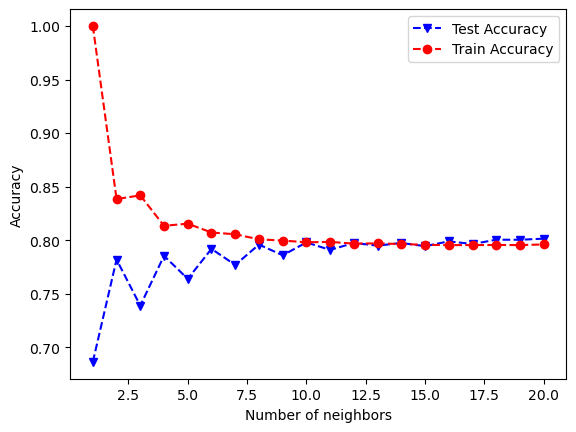

In [7]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy on the test data is: %.2f' % accuracy)

numNeighbors = []
testAcc = []
trainAcc = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    numNeighbors.append(k)
    trainAcc.append(train_accuracy)
    testAcc.append(test_accuracy)

plt.plot(numNeighbors, testAcc,'bv--',numNeighbors, trainAcc, 'ro--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [85]:
from sklearn.neighbors import KNeighborsClassifier

k_values = [1, 3, 5, 7, 9, 11, 13, 30, 500]  # different values of k to try
best_k = None
best_accuracy = 0

for k in k_values:
    # create a KNN model with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
    print(f'Accuracy with {k} neighbors: {accuracy:.4f}')

print(f'Best accuracy of {best_accuracy:.4f} achieved with {best_k} neighbors')


/Users/jeremyvuong/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/jeremyvuong/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

Accuracy with 1 neighbors: 0.6865
Accuracy with 3 neighbors: 0.7390
Accuracy with 5 neighbors: 0.7640
Accuracy with 7 neighbors: 0.7770


/Users/jeremyvuong/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/jeremyvuong/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

Accuracy with 9 neighbors: 0.7860
Accuracy with 11 neighbors: 0.7910
Accuracy with 13 neighbors: 0.7950
Accuracy with 30 neighbors: 0.8040
Accuracy with 500 neighbors: 0.8035
Best accuracy of 0.8040 achieved with 30 neighbors


/Users/jeremyvuong/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Support Vector Machines

In [86]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy on the test data is: %.2f' % accuracy)

Accuracy on the test data is: 0.80


# Logistic Regression

Accuracy = 0.8005


Text(0.5, 1.0, 'Accuracy Score: 0.8005')

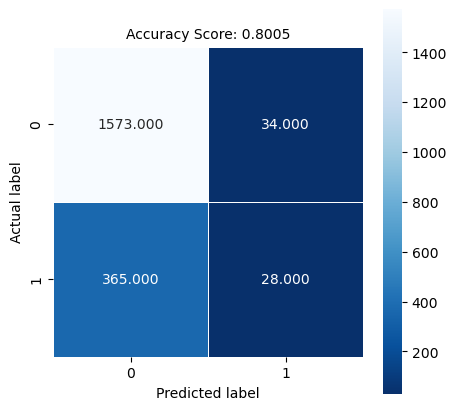

In [87]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics

#train
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

#predictions
LRpredictions = logisticRegr.predict(X_test)

LRaccuracy = logisticRegr.score(X_test, y_test)
print("Accuracy =", LRaccuracy)

#confusion matrix
cm = metrics.confusion_matrix(y_test, LRpredictions)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(LRaccuracy)
plt.title(all_sample_title, size = 10)



# Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score

clf_dt = DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf_dt.fit(X_train, y_train)
dt_pred = clf_dt.predict(X_test)
print(dt_pred)

print('Accuracy on test data is %.2f' % (accuracy_score(y_test, dt_pred)))

[0 0 0 ... 0 0 0]
Accuracy on test data is 0.84


In [89]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[1580   27]
 [ 295   98]]
Accuracy on test data is 0.84
F1 score on test data is 0.38
Precision Score on test data is 0.78
Recall score on test data is 0.25
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      1607
           1       0.78      0.25      0.38       393

    accuracy                           0.84      2000
   macro avg       0.81      0.62      0.64      2000
weighted avg       0.83      0.84      0.80      2000



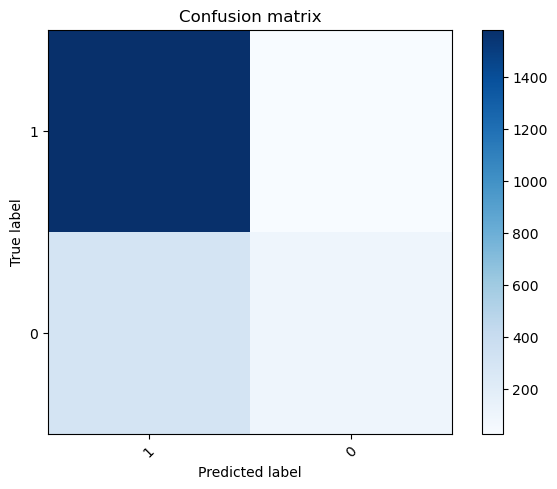

In [90]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score,recall_score,classification_report

confusion = confusion_matrix(y_test, dt_pred)
print(confusion)

plot_confusion_matrix(confusion, 
                      Y.unique(), 
                      title='Confusion matrix', 
                      cmap=plt.cm.Blues)

print('Accuracy on test data is %.2f' % (accuracy_score(y_test, dt_pred)))
print('F1 score on test data is %.2f' % (f1_score(y_test, dt_pred, pos_label=1)))
print('Precision Score on test data is %.2f' % (precision_score(y_test, 
                                                                dt_pred,
                                                                pos_label=1)))
print('Recall score on test data is %.2f' % (recall_score(y_test, 
                                                          dt_pred,pos_label=1)))
print( classification_report(y_test, dt_pred))

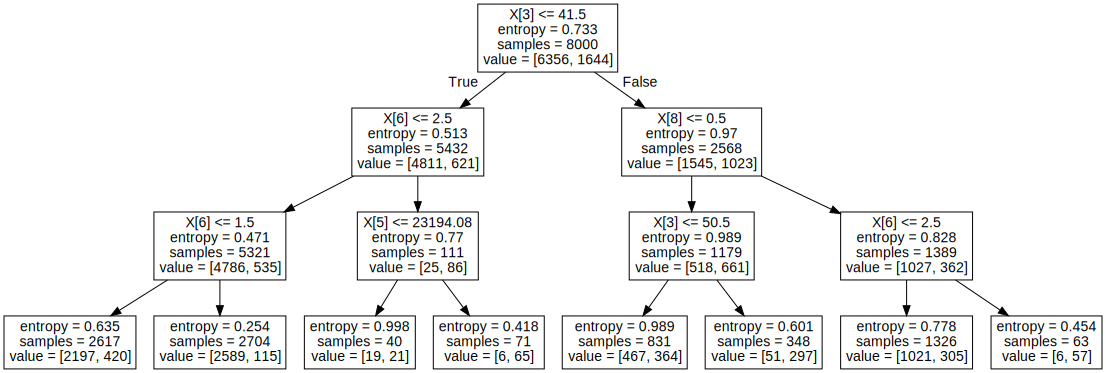

In [91]:
import graphviz 
dot_data = export_graphviz(clf_dt, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

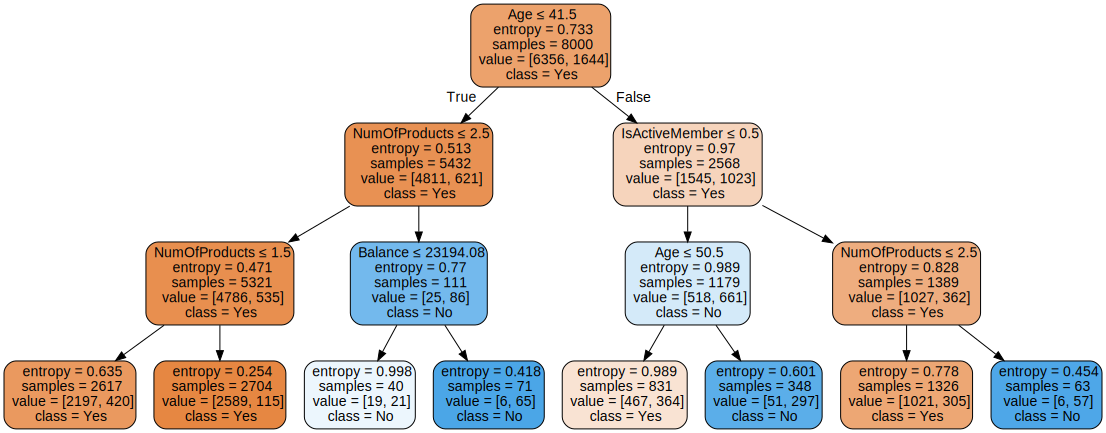

In [92]:
dot_data = export_graphviz(clf_dt, out_file=None, 
                      feature_names=X.columns,  
                      class_names=['Yes','No'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [93]:
import graphviz 
dot_data = export_graphviz(clf_dt, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.view()


'Source.gv.pdf'